In [28]:
import random
import torch
import matplotlib.pyplot as plt

from roomfuser.dataset.roomfuser_dataset import RirDataset
from roomfuser.params import params
%matplotlib inline

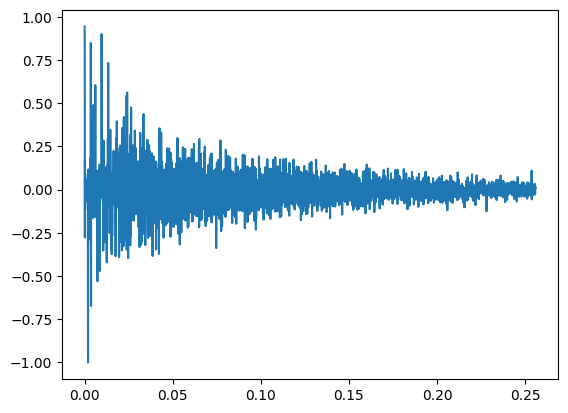

In [29]:
# 1. Load random RIR from dataset

rir_dataset = RirDataset(
    params.roomfuser_dataset_path,
    n_rir=params.rir_len,
    trim_direct_path=params.trim_direct_path,
    scaler_path=params.roomfuser_scaler_path,
)

n_dataset = len(rir_dataset)
idx = random.randint(0, n_dataset)
rir = rir_dataset[idx]["rir"]
n_rir = rir.shape[0]
t = torch.arange(n_rir)/params.sample_rate
plt.plot(t, rir)

## Plot Frequency response

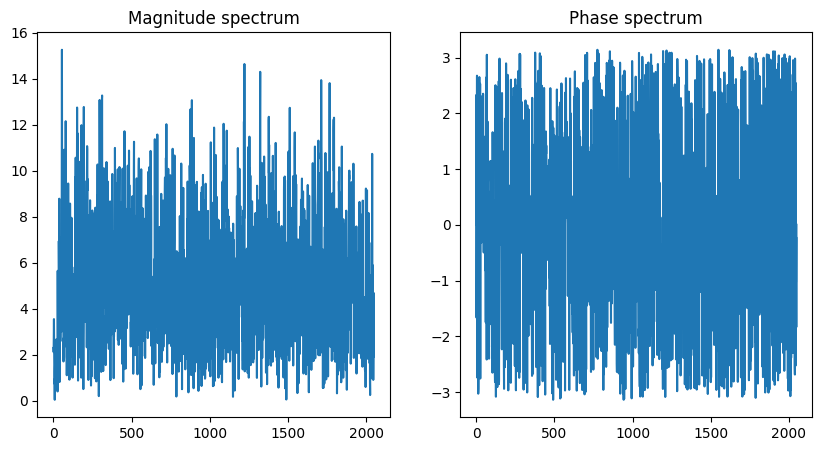

In [30]:
freq_response = torch.fft.rfft(rir)

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

axs[0].plot(freq_response.abs())
axs[0].set_title("Magnitude spectrum")

axs[1].plot(freq_response.angle())
axs[1].set_title("Phase spectrum")

plt.show()

## Invert to see if is the same

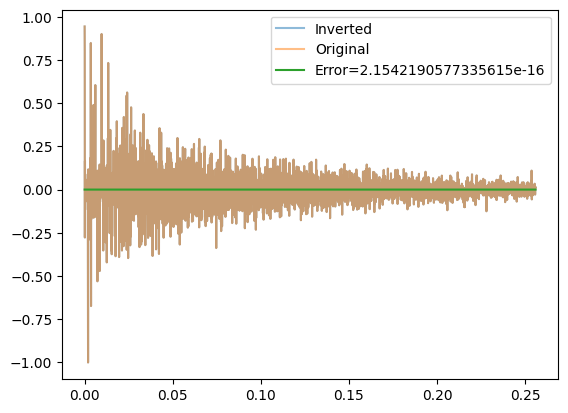

In [31]:
rir_inv = torch.fft.irfft(freq_response, n=n_rir)

plt.plot(t, rir_inv, label="Inverted", alpha=0.5)

plt.plot(t, rir, label="Original", alpha=0.5)

error_sig = rir - rir_inv
error_val = (error_sig**2).mean()
plt.plot(t, error_sig, label=f"Error={error_val}")
plt.legend()
plt.show()